## Problem 1

Suppose that the probabilities that a neuron responds with a firing rate between $r$ and $r + \Delta r$ to two stimuli labeled plus and minus are $p[r|\pm]\Delta r$ where

$$p[r|\pm]=\frac{1}{\sqrt{2\pi}\sigma_r}\exp\left(-\frac{1}{2}\left(\frac{r-\langle r \rangle_\pm}{\sigma_r}\right)^2\right)$$

Assume that the two mean rate parameters $\langle r\rangle_+$ and $\langle r\rangle_-$ and the single variance $\sigma_r^2$ are chosen so that these distributions produce negative rates rarely enough that we can integrate over $r$ values over the entire range $-\infty < r < \infty$.

### Part a
Suppose that you base discrimination of the plus and minus stimuli on whether the evoked firing rate is greater or less than a threshold $z$. Show that the size and power, $\alpha(z)$ and $\beta(z)$ of this test are given by

$$\alpha(z)=\frac{1}{2}\text{erfc}\left(\frac{z-\langle r \rangle_-}{\sqrt{2}\sigma_r}\right)\text{ and }\beta(z)=\frac{1}{2}\text{erfc}\left(\frac{z-\langle r \rangle_+}{\sqrt{2}\sigma_r}\right)$$

### Solution
---
$$\alpha(z)=p[r\ge z|-]=\int_z^\infty dr\, \frac{1}{\sqrt{2\pi}\sigma_r}\exp\left(-\frac{1}{2}\left(\frac{r-\langle r \rangle_-}{\sigma_r}\right)^2\right)$$

Now, let

$$u=\frac{r-\langle r\rangle_-}{\sqrt{2}\sigma_r} \implies dr=\sqrt{2}\sigma_r du$$

Therefore

$$\alpha(z)=\frac{1}{2}\int_{r=z}^\infty du\,\frac{2\exp(-u^2)}{\sqrt{\pi}}=\frac{1}{2}\text{erfc}\left(\frac{z-\langle r \rangle_-}{\sqrt{2}\sigma_r}\right)$$

The exact same calculation works for $\beta(z)$ simply using $\langle r \rangle_+$ instead of $\langle r \rangle_-$.

---

### Part b
Show that the probability of a correct answer in the associated two-alternative forced choice task involving discriminating between plus-then-minus and minus-then-plus presentations of the two stimuli is given by

$$P[\text{correct}]=\frac{1}{2}\text{erfc}\left(\frac{\langle r\rangle_- - \langle r\rangle_+}{2\sigma_r}\right)=\frac{1}{2}\text{erfc}\left(-\frac{d'}{2}\right)$$

### Solution
---
$$P[\text{correct}]=\int_0^\infty dz\,p[z|-]\beta(z)=\frac{1}{2}\int_0^\infty dz\,\frac{1}{\sqrt{2\pi}\sigma_r}\exp\left(-\frac{1}{2}\left(\frac{z-\langle r \rangle_-}{\sigma_r}\right)^2\right)\text{erfc}\left(\frac{z-\langle r \rangle_+}{\sqrt{2}\sigma_r}\right)=$$

**TODO**

---

### Part c
Derive the result of

$$P[+|r]=\frac{1}{1+\exp(-d'(r-r_{ave})/\sigma_r)}$$

### Solution
---
$$P[+|r]=\frac{p[r|+]P[+]}{p[r]}=\frac{p[r|+]P[+]}{p[r|+]P[+]+p[r|-]P[-]}=\frac{p[r|+]}{p[r|+]+p[r|-]}=\frac{1}{1+p[r|-]/p[r|+]}$$

$$\frac{p[r|-]}{p[r|+]}=\exp\left(-\frac{1}{2}\left(\left(\frac{r-\langle r \rangle_-}{\sigma_r}\right)^2-\left(\frac{r-\langle r \rangle_+}{\sigma_r}\right)^2\right)\right)=\exp\left(-\frac{1}{2\sigma_r^2}\left(\langle r \rangle_-^2 - 2r\langle r \rangle_- -\langle r \rangle_+^2 + 2\langle r \rangle_+\right)\right)$$

$$=\exp\left(-\frac{1}{2\sigma_r^2}(\langle r \rangle_+ - \langle r \rangle_-)\left(2r - \langle r \rangle_+ - \langle r \rangle_-\right)\right)=\exp\left(-\frac{1}{\sigma_r}\left(\frac{\langle r \rangle_+ - \langle r \rangle_-}{\sigma_r}\right)\left(r-\frac{\langle r \rangle_+ + \langle r \rangle_-}{2}\right)\right)=\exp\left(\frac{-d'(r-r_{ave})}{\sigma_r}\right)$$

---

### Part d
Plot ROC curves for different values of the discriminability

$$d'=\frac{\langle r \rangle_+ - \langle r \rangle_-}{\sigma_r}$$

### Solution
---
Let $x=z-\langle r \rangle_-$. Then

$$\alpha(x)=\frac{1}{2}\text{erfc}\left(\frac{x}{\sqrt{2}\sigma_r}\right)\text{ and }\beta(x)=\frac{1}{2}\text{erfc}\left(\frac{x-d'\sigma_r}{\sqrt{2}\sigma_r}\right)=\alpha(x-d'\sigma_r)$$

---

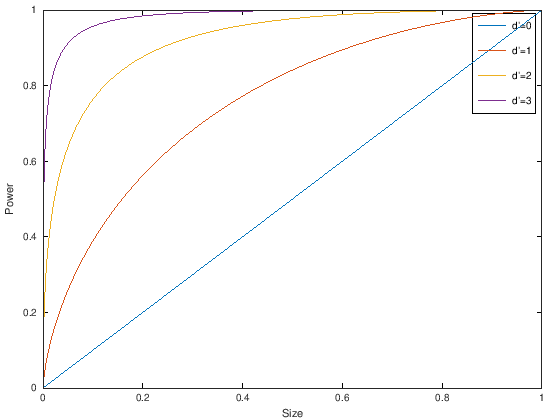

In [21]:
x = -10:0.1:10;
metric = @(x, d) 0.5*erfc((x-d)/sqrt(2));
a = metric(x, 0);
plot(a, a)
hold on;
plot(a, metric(x, 1))
plot(a, metric(x, 2))
plot(a, metric(x, 3))
legend("d'=0","d'=1","d'=2","d'=3")
xlabel('Size')
ylabel('Power')

### Part e
By simulation, determine the fraction of correct discriminations that can be made in the two-alternative forced choice task. Show that the fractions of correct answer for different values of $d'$ are equal to the areas under the corresponding ROC curves.

In [107]:
num_samples = 100000;
x = -10:0.1:10;
metric = @(x, d) 0.5*erfc((x-d)/sqrt(2));
a = metric(x, 0);

disp([
    "| d | Ratio correct    | AUC    |"
    "|---|------------------|--------|"
])
for d = 0:3
    r_neg = normrnd(-d/2, 1, num_samples, 1);
    r_pos = normrnd(d/2, 1, num_samples, 1);
    correct = mean(r_pos > r_neg);
    auc = -1.0000 * trapz(a, metric(x, d));
    disp([...
        "| "...
        num2str(d)...
        " | "...
        num2str(correct, '%0.4f')...
        "           | "...
        num2str(auc, '%0.4f')...
        " |"...
    ]);
end

| d | Ratio correct    | AUC    |
|---|------------------|--------|
| 0 | 0.5005           | 0.5000 |
| 1 | 0.7602           | 0.7601 |
| 2 | 0.9215           | 0.9212 |
| 3 | 0.9826           | 0.9830 |


## Problem 2
Simulate the random-dot discrimination experiment. Denote the stimulus by plus or minus, corresponding to the two directions of motion. On each trial, choose the stimulus randomly with equal probability for the two cases. When the minus stimulus is chosen, generate the responses of the neuron as 20 Hz plus a random Gaussian term with a standard deviation of 10 Hz (set any rates that come out negative to zero). When the plus stimulus is chosen, generate the responses as $20 + 10d$ Hz plus a random Gaussian term with a standard deviation of 10 Hz, where $d$ is the discriminability (again, set any rates that come out negative to zero). First, choose a threshold $z = 20 + 5d$, which is half-way between the means of the two response distributions. Whenever $r \ge z$ guess "plus", otherwise guess "minus". Over a large number of trials (1000, for example) determine how often you get the right answer for different $d$ values. Plot the percent correct as a function of d over the range $0 \le d \le 10$. Next, by allowing $z$ to vary over a range, plot ROC curves for several values of $d$ (starting with $d = 2$). To do this, determine how frequently the guess is "plus" when the stimulus is, in fact, plus (this is $\beta$), and how often the guess is "plus" when the real stimulus is minus (this is $\alpha$). Then, plot $\beta$ versus $\alpha$ for $z$ over the range $0 \le z \le 140$.

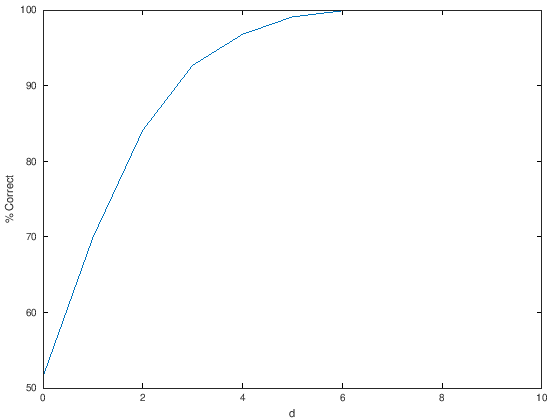

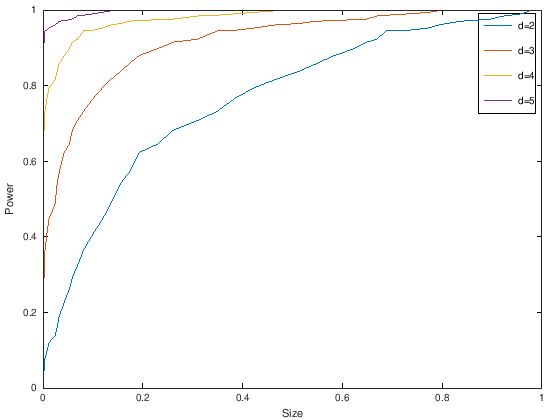

In [65]:
num_trials = 1000;
direction = rand(num_trials, 1) > 0.5;

r0 = 20;
std_dev = 10;
baseline = r0 + normrnd(0, std_dev, size(direction));

d = 0:10;
z = 20 + 5*d;
responses = baseline + 10*direction*d;
guesses = responses >= z;
correct = mean(guesses == direction, 1);

figure()
plot(d, 100 * correct);
xlabel("d");
ylabel("% Correct");

z = 0:140;
figure()
for d = 2:5
    guesses = responses(1:end, d) >= z;
    b = mean(guesses(direction, 1:end), 1);
    a = mean(guesses(~direction, 1:end), 1);
    plot(a, b);
    hold on;
end
legend('d=2', 'd=3', 'd=4', 'd=5');
xlabel('Size')
ylabel('Power')
hold off;

## Problem 3

Simulate the responses of four interneurons in the cercal system of the cricket and check the accuracy of a vector decoding scheme. For a true wind direction $\theta$, the average firing rates of the four interneurons should be generated as

$$\langle r_i \rangle = [50\cos(\theta-\theta_i)]_+ \text{Hz}$$

where $[ ]_+$ indicates half-wave rectification, and $\theta_i = \pi/4, 3\pi/4, 5\pi/4, 7\pi/4$ for $i = 1, 2, 3, 4$. The actual rates, $r_i$ , are then obtained by adding to these mean rates a random number chosen from a Gaussian distribution with zero mean and a standard deviation of 5 Hz (set any rates the come out negative to zero). From these rates, construct the $x$ and $y$ components of the population vector

$$x = \sum_{i=1}^{4}r_i\cos(\theta_i) \text{  and  } y = \sum_{i=1}^{4}r_i\sin(\theta_i)$$

and, from the direction of this vector, compute an estimate $\theta_{est}$ of the wind direction. Average the squared difference $(\theta - \theta_{est})^2$ over 1000 trials. The square root of of this quantity is the error. Plot the error as a function of $\theta$ over the range $-90^\circ \le \theta \le 90^\circ$.

In [3]:
# TODO

## Problem 4

Show that if an infinite number of unit vectors $\vec{c_a}$ is chosen uniformly from a probability distribution that is independent of direction, $\Sigma(\vec{v} \cdot \vec{c_a})\vec{c_a}\propto\vec{v}$ for any vector $\vec{v}$. How does the sum approach this limit for a finite number of terms?

In [4]:
# TODO

## Problem 5

Show that the Bayesian estimator that minimizes the expected average value of the the loss function $L(s, s_\text{bayes}) = (s -s_\text{bayes})^2$ is the mean of the distribution $p[s|\textbf{r}]$, given by

$$s_\text{bayes}=\int ds\,p[s|\textbf{r}]s$$

Also show that the estimate that arises from minimizing the expected loss function $L(s, s_\text{bayes}) = \left|s -s_\text{bayes}\right|$ is the median of $p[s|\textbf{r}]$

In [5]:
# TODO

## Problem 6

Show that the Fisher information
$$I_F(s)=\left\langle-\frac{\partial^2\ln p[\textbf{r}|s]}{\partial s^2}\right\rangle=\int d\textbf{r}\,p[\textbf{r}|s]\left(-\frac{\partial^2\ln p[\textbf{r}|s]}{\partial s^2}\right)$$

Can also be written as

$$I_F(s)=\left\langle\left(\frac{\partial\ln p[\textbf{r}|s]}{\partial s}\right)^2\right\rangle=\int d\textbf{r}\,p[\textbf{r}|s]\left(\frac{\partial\ln p[\textbf{r}|s]}{\partial s}\right)^2$$

or as

$$I_F(S)=\int d\textbf{r}\frac{1}{p[\textbf{r}|s]}\left(\frac{\partial p[\textbf{r}|s]}{\partial s}\right)^2$$

Use the fact that $\int dr\,p[\textbf{r}|s] = 1$.

In [6]:
# TODO

## Problem 7

The discriminability for the variable $Z$ defined by

$$Z(r)=\frac{\partial\ln p[r|s]}{\partial s}$$

is the difference between the average $Z$ values for the two stimuli $s + \Delta s$ and $s$ divided by the standard deviation of $Z$. The average of the difference in $Z$ values is

$$\langle\Delta Z\rangle=\int d\textbf{r}\frac{\partial\ln p[\textbf{r}|s]}{\partial s}(p[\textbf{r}|s+\Delta s]-p[\textbf{r}|s])$$

Show that for small $\Delta s$, $\langle \Delta Z\rangle = I_F(s)\Delta s$. Also prove that the average value of $Z$,

$$\langle Z\rangle=\int d\textbf{r}\,p[\textbf{r}|s]\frac{\partial\ln p[\textbf{r}|s]}{\partial s}$$

is zero, and that the variance of $Z$ is $I_F(s)$. Computing the ratio, we find from these results that $d' =\Delta s\sqrt{I_F(s)}$ which matches the discriminability 3.49 of the ML estimator.

In [7]:
## TODO

## Problem 8

Extend

$$I_F(s)=T\sum_{a=1}^{N}\frac{r_{max}(s-s_a)^2}{\sigma_r^4}\exp\left(-\frac{1}{2}\left(\frac{s-s_a}{\sigma_r}\right)^2\right)$$

to the case of neurons encoding a $D$-dimensional vector stimulus $\vec{s}$ with tuning curves given by

$$f_a(\vec{s})=r_{max}\exp\left(-\frac{|\vec{s}-\vec{s_a}|^2}{2\sigma_r^2}\right)$$

and perform the sum by approximating it as an integral over uniformly and densely distributed values of $\vec{s_a}$ to derive the result

$$I_F=\frac{(2\pi)^{D/2}\rho_s\sigma_r^D r_{max}T}{D\sigma_r^2}=\frac{(2\pi)^{D/2}\rho_s\sigma_r^{D-2}r_{max}T}{D}$$

In [8]:
## TODO

## Problem 9

Minimize the expression

$$\frac{1}{T}\int_0^T\left\langle\left(\int_{-\infty}^{\infty}d\tau\,(\rho(t-\tau)-\langle r\rangle)K(\tau)-s(t-\tau_0)\right)^2\right\rangle$$

to derive

$$\int_{-\infty}^{\infty}d\tau' Q_{pp}(\tau - \tau')K(\tau')=Q_{rs}(\tau-\tau_0)$$

Use the methods of appendix A of chapter 2.

In [9]:
## TODO

## Problem 10

Matlab program `c3p10.m` performs acausal decoding using signal processing techniques to construct an approximate solution of

$$\int_{-\infty}^{\infty}d\tau' Q_{pp}(\tau - \tau')K(\tau')=Q_{rs}(\tau-\tau_0)$$

while suppressing unwanted effects of noise (for an illustration of these effects, see part (e) of this exercise). The program is called as `[est,K,ind]=ch3ex10(stim,spk,nfft)`, where `stim` and `spk` are the stimulus and response respectively, `nfft` is the length of a discrete Fourier transform (suitable values are `nfft`= $2^10$ = 1024 or $2^11$ = 2048), `K` is the acausal kernel, `est` is the resulting stimulus estimate, and `ind` is a vector of indices that specifies the range over which the estimate and stimulus should be compared. Specifically, `est` provides an estimate of `stim(ind)`.

### Part a
Compute an estimated firing rate $r_{est}$ from

$$r_{est}(t)=r_0+\int_0^{\infty}d\tau\,D(\tau)s(t-\tau)$$

with $r_0 = 50$Hz and

$$D(\tau)=-\cos\left(\frac{2\pi(\tau-20\text{ms})}{140\text{ms}}\right)\exp\left(-\frac{\tau}{60\text{ms}}\right)\text{Hz/ms}$$

in response to an approximate white noise stimulus (roughly 500 seconds long) calculated by choosing at each time step (with $\Delta t$ = 10 ms) a stimulus value from a Gaussian distribution with mean 0 and variance 2. Generate a kernel and estimate for this stimulus using `c3p10.m` with $r_{est}$ playing the role of the argument `spk`. Verify that `est` and `stim(ind)` are closely related, and describe the relationship between the coding kernel $D$ and the decoding kernel $K$.

In [10]:
## TODO

### Part b

Repeat part a with a rectification non-linearity, so that $[r_{est}]_+$ is used in place of $r_{est}$. Measure the effect of the nonlinearity by comparing the average (over time) of the squared difference between `est` and `stim(ind)`, divided by the variance of `stim`, for the rectified and nonrectified cases. What is the effect of rectification on the optimal decoding kernel `K`, and why? Assess the accuracy with which different frequency components in `stim` are captured in `est` by considering the power spectrum of the average squared difference between `est` and `stim(ind)`.

In [11]:
## TODO

### Part c

Generate a spike sequence `spk` from the rectified firing rate $[r_{est}]_+$ using a Poisson generator. The sequence `spk` should consist of a one or a zero at each time step, depending on whether or not a spike occurred. Recompute the acausal kernel as in part a, but using `spk` as the response rather than $r_{est}$. How accurate is the resulting decoding, and what is the effect of using spikes rather than rates on the decoding kernel `K`?

In [12]:
## TODO

### Part d

What happens to decoding accuracy as the value of $\Delta t$, which defines the approximation to a white noise stimulus, increases and why? In the general case, the approximate white noise should be generated by choosing a stimulus value at each time step from a Gaussian distribution with mean 0 and variance 20 ms/$\Delta t$.

In [13]:
## TODO

### Part e
Attempt to repeat the decoding in part a using the cross-correlation function `xcorr` and the fast Fourier transform `fft` to solve

$$\int_{-\infty}^{\infty}d\tau' Q_{pp}(\tau - \tau')K(\tau')=Q_{rs}(\tau-\tau_0)$$

Why is the answer so noisy?

In [14]:
## TODO